## Overview
RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: recency, frequency, and monetary value. These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction data including customer ID, purchase date, transaction amount, product information, ID command and location. The platform aims to leverage RFM (recency, frequency, monetary value) analysis to segment customers and optimize customer engagement strategies.

### Metric of Success

Your task is to perform RFM analysis and develop customer segments based on their RFM scores. The analysis should provide insights into customer behaviour and identification of high-value customers, at-risk customers, and potential opportunities for personalized marketing campaigns.

In [1]:
#load relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
data = pd.read_csv ("rfm_data.csv")

data.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
#check the dataset description
data.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


##### We can see the maximum transaction done was 1000.

In [28]:
#checking data types
data.dtypes

CustomerID                     int64
PurchaseDate          datetime64[ns]
TransactionAmount            float64
ProductInformation            object
OrderID                        int64
Location                      object
Recency                        int64
freq_d                         int64
Frequency                      int64
MonetaryValue                float64
dtype: object

In [29]:
#checking for any null values 
data.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
Recency               0
freq_d                0
Frequency             0
MonetaryValue         0
dtype: int64

In [4]:
#checking for the date the maximum transaction was done
data['PurchaseDate'].max()

'2023-06-10'

In [5]:
#checking for the date the minimum transaction was done
data['PurchaseDate'].min()

'2023-04-11'

In [15]:
#checking for the specific locations with the most transactions
data['Location'].unique()

array(['Tokyo', 'London', 'New York', 'Paris'], dtype=object)

* To know exact period of when these transactions were made, we'll be subtracting the purchase date from the current date as seen from the sample shared to see the last transactions done with the customers

In [16]:
#first we'll convert the PurchaseDate column to DateTime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [17]:
# Import the necessary libraries
from datetime import datetime
# Convert 'PurchaseDate' to datetime format
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [18]:
#confirm conversion
data['PurchaseDate'].dtype

dtype('<M8[ns]')

In [19]:
#begin converting
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], format='%Y-%m-%d')
data.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [24]:
# Calculate the recency
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days
data[['PurchaseDate', 'Recency']]

,PurchaseDate,Recency
0,2023-04-11,187
1,2023-04-11,187
2,2023-04-11,187
3,2023-04-11,187
4,2023-04-11,187
...,...,...
995,2023-06-10,127
996,2023-06-10,127
997,2023-06-10,127
998,2023-06-10,127


In [25]:
# Calculate Frequency to determine the number of purchases made by each customer.
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)

# Renaming the 'Frequency' column in the 'data' DataFrame to avoid duplicate columns
data.rename(columns={'Frequency': 'freq_d'}, inplace=True)

# Merging the 'data' and 'frequency_data'columns on 'CustomerID'
data = data.merge(frequency_data, on='CustomerID', how='left')

data.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,freq_d,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,187,1,1
1,2188,2023-04-11,463.70,Product A,176819,London,187,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,187,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,187,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,187,1,1


In [26]:
# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,freq_d,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,187,1,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,187,1,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,187,1,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,187,1,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,187,1,1,739.56


In [30]:
#checking for any duplicates
data.duplicated().sum()

0

So far, the dataset has no null or duplicated values and we can proceed to the next step

## EDA

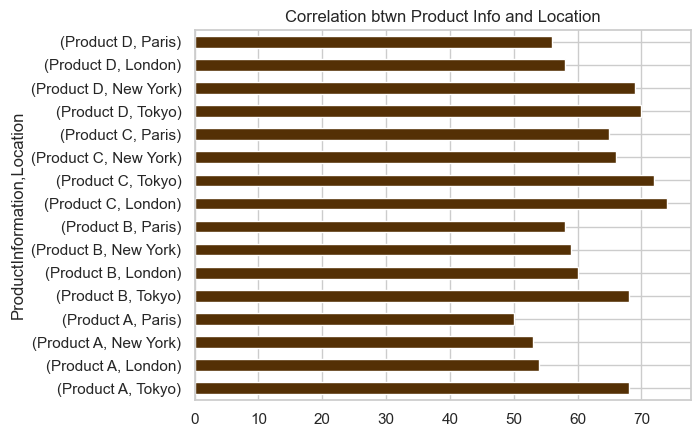

In [83]:
prodinfo_location =data.groupby('ProductInformation')
prodinfo_location['Location'].value_counts().plot(kind="barh",colormap='BrBG', title = 'Correlation btwn Product Info and Location');

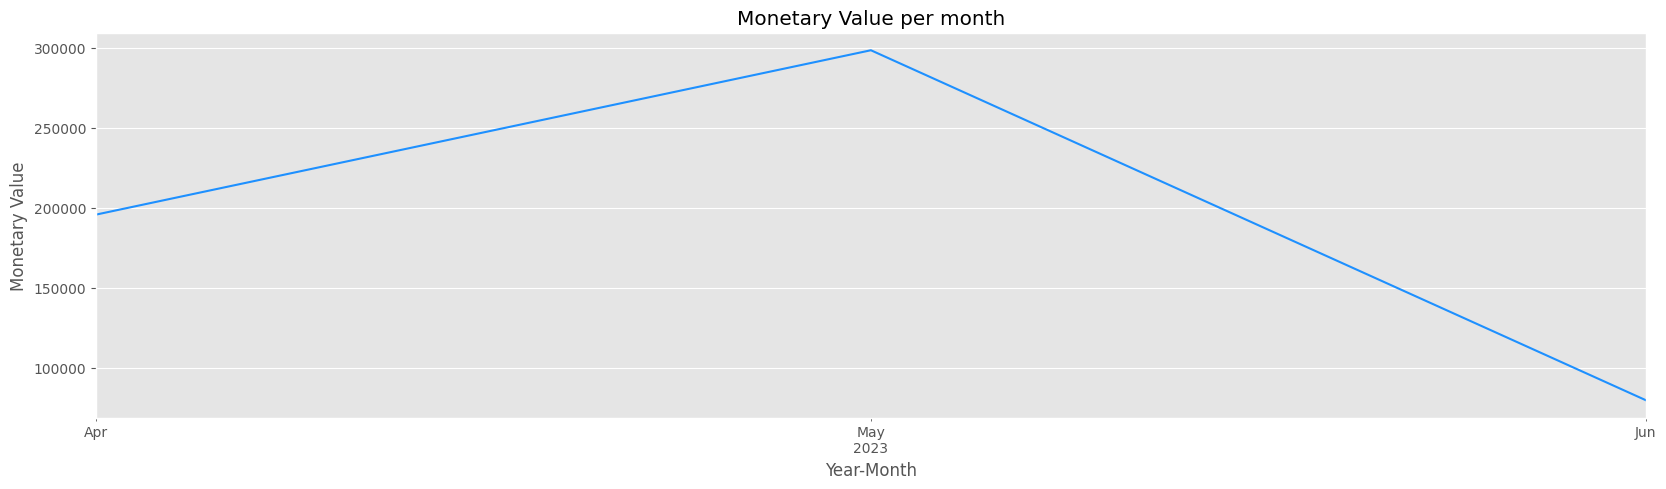

In [32]:
#Create a new column to extract the month and year
data['YearMonth'] = data['PurchaseDate'].dt.to_period('M')

#Group by 'YearMonth' and sum the 'MonetaryValue' for each month
monthly_monetary = data.groupby('YearMonth')['MonetaryValue'].sum()

plt.style.use('ggplot')
monthly_monetary.plot(figsize=(20, 5), color='dodgerblue')
plt.title('Monetary Value per month')
plt.ylabel('Monetary Value')
plt.xlabel('Year-Month')
plt.show()


In [40]:
#Calculating RFM Scores as done in the sample
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency 
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

In [41]:
#convert the scores to integer/ numerical values
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [43]:
# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

In [46]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'].cat.codes + data['FrequencyScore'].cat.codes + data['MonetaryScore'].cat.codes

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

data.head(5)


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,freq_d,Frequency,MonetaryValue,YearMonth,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,187,1,1,943.31,2023-04,1,1,2,5,High-Value
1,2188,2023-04-11,463.70,Product A,176819,London,187,1,1,463.70,2023-04,1,1,1,4,Mid-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,187,1,1,80.28,2023-04,1,1,1,4,Mid-Value
3,2559,2023-04-11,221.29,Product A,239145,London,187,1,1,221.29,2023-04,1,1,1,4,Mid-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,187,1,1,739.56,2023-04,1,1,2,5,High-Value


In summary, the RFM (Recency, Frequency, Monetary Value) analysis has provided invaluable insights into our customer base, enabling us to gain a deeper understanding of their behaviors and preferences. By classifying our customers into distinct categories based on their RFM scores, we've been able to recognize high-value clients who engage frequently and significantly contribute to our revenue. Furthermore, this analysis has allowed us to pinpoint potentially disengaged customers who may benefit from tailored engagement strategies to reduce the risk of disconnection. Customizing our marketing efforts to cater to each customer segment helps us refine our campaigns and offer a more personalized experience to our clients, ultimately leading to improved customer satisfaction and loyalty.